<a href="https://colab.research.google.com/github/sriloksagar/Intern_ND/blob/master/Morphology_(preprocessing_before_NER).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [312]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


**Importing libraries**

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

**Reading images**

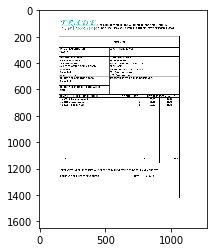

In [314]:
img = imread('/content/drive/My Drive/Colab Notebooks/Intern_ND/sample_invoice.jpeg')
plt.imshow(np.real(img))

**Converting to Grayscale**

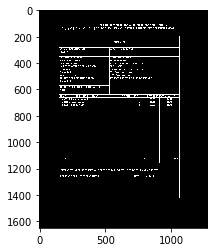

In [315]:
result = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(thresh,'gray')

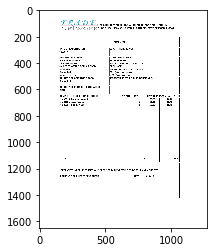

In [316]:
horizantal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(75,1))
remove_horizantal = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,horizantal_kernel,iterations=2)
cnts = cv2.findContours(remove_horizantal,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result,[c],-1,(255,255,255), 2)
plt.imshow(result,'gray')

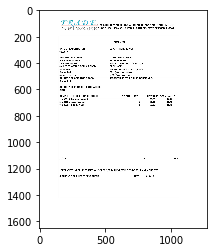

In [317]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(1,50))
remove_vertical = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,vertical_kernel,iterations=2)
cnts = cv2.findContours(remove_vertical,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result,[c],-1,(255,255,255), 2)
plt.imshow(result,'gray')

In [318]:
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/Intern_ND/sample_invoice_new.jpeg',result)
cv2.waitKey()

-1